In [1]:
import os
import re
import numpy as np

## build dataset

In [2]:
def getData(strategy, output, defaultStrategy, defaultOutput) -> list:
    """Wrap up strategies and outputs to generate an input list"""
    dataset = []
    defaultInputSet = []
    inputset = []
#     coef = {'size' : None, 'offset' : None, 'mazeEndIter' : None, 'MarkerCost' : None, 
#              'FixedShapeCost' : None, 'Decay' : None, 'ripupMode': None, 'followGuide' : None}
    # parse default strategy and output
    # check input file exists
    if not os.path.exists(defaultStrategy):
        print("Default strategy {} doesn't exist!".format(defaultStrategy))
        return []
    # parse default strategy
    with open(defaultStrategy, 'r') as f:
        line = f.readline()
        temp = line.split("@")
        for i in range(len(temp) - 1):
            element = temp[i]
            coef = dict([])
            # parse 1 strategy
            result = element.split(",")[:-1]
            coef['size'] = int(result[0])
            coef['offset'] = int(result[1])
            coef['mazeEndIter'] = int(result[2])
            coef['MarkerCost'] = int(result[3])
            coef['FixedShapeCost'] = int(result[4])
            coef['Decay'] = float(result[5])
            if result[6] == 'ALL':
                coef['ripupMode'] = 0
            elif result[6] == 'DRC':
                coef['ripupMode'] = 1
            else:
                coef['ripupMode'] = 2
            if result[7] == 'True':
                coef['followGuide'] = 1
            elif result[7] == 'False':
                coef['followGuide'] = 0
            # add result to list
            defaultInputSet.append(coef)
    # check input file exists
    if not os.path.exists(defaultOutput):
        print("Default strategy output {} doesn't exist!".format(defaultOutput))
        return []
    # parse default strategy outputs
    with open(defaultOutput, 'r') as f:
        allLines = f.readlines()
        for line in allLines:
            result = line.split(',')[:-1]
            datapoint = []
            for i, value in enumerate(result):
                datapoint.append([defaultInputSet[i], int(value)])
            # add datapoint into dataset
            dataset.append(datapoint)
    # parse strategy and output
    # check input file exists
    if not os.path.exists(strategy):
        print("Strategy {} doesn't exist!".format(strategy))
        return []
    # parse strategy
    with open(strategy, 'r') as f:
        allLine = f.readlines()
        for line in allLine:
            temp = line.split("@")
            instrategy = []
            for i in range(len(temp) - 1):
                element = temp[i]
                coef = dict([])
                # parse 1 strategy
                result = element.split(",")[:-1]
                coef['size'] = int(result[0])
                coef['offset'] = int(result[1])
                coef['mazeEndIter'] = int(result[2])
                coef['MarkerCost'] = int(result[3])
                coef['FixedShapeCost'] = int(result[4])
                coef['Decay'] = float(result[5])
                if result[6] == 'ALL':
                    coef['ripupMode'] = 0
                elif result[6] == 'DRC':
                    coef['ripupMode'] = 1
                else:
                    coef['ripupMode'] = 2
                if result[7] == 'True':
                    coef['followGuide'] = 1
                elif result[7] == 'False':
                    coef['followGuide'] = 0
                # add result to list
                instrategy.append(coef)
            inputset.append(instrategy)
    # check input file exists
    if not os.path.exists(output):
        print("Output {} doesn't exist!".format(output))
        return []
    # parse strategy outputs
    with open(output, 'r') as f:
        allLines = f.readlines()
        for index, line in enumerate(allLines):
            result = line.split(',')[:-1]
            datapoint = []
            for i, value in enumerate(result):
                if i > 63:
                    break
#                 print("design {} strategy {}".format(index + 1, i + 1))
                datapoint.append([inputset[index][i], int(value)])
            # add datapoint into dataset
            dataset.append(datapoint)
            
    return dataset

In [5]:
defaultStrategy = "./DefaultStrategy.txt"
defaultOutput = "./defaultOutputs.txt"
strategy = "./strategy.txt"
output = "./outputs.txt"
dataset = getData(strategy, output, defaultStrategy, defaultOutput)

In [6]:
len(dataset)

77

In [7]:
dataset[0]

[[{'size': 7,
   'offset': 0,
   'mazeEndIter': 3,
   'MarkerCost': 0,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  10178],
 [{'size': 7,
   'offset': -2,
   'mazeEndIter': 3,
   'MarkerCost': 8,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  569],
 [{'size': 7,
   'offset': -5,
   'mazeEndIter': 3,
   'MarkerCost': 8,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  499],
 [{'size': 7,
   'offset': 0,
   'mazeEndIter': 8,
   'MarkerCost': 32,
   'FixedShapeCost': 16,
   'Decay': 0.95,
   'ripupMode': 1,
   'followGuide': 0},
  1],
 [{'size': 7,
   'offset': -1,
   'mazeEndIter': 8,
   'MarkerCost': 32,
   'FixedShapeCost': 16,
   'Decay': 0.95,
   'ripupMode': 1,
   'followGuide': 0},
  0]]

# Turning datapoint to tensor

To represent a single data point input, we use a tensor of size <No_Strategy x 1 x 8>. (8 is the number of items)

In [8]:
import torch

In [9]:
n_output = max([len(x) for x in dataset])
n_output

65

In [10]:
def datasetToTensor(dataset, dim):
    """Turning the input to tensor. Remain output format"""
    Dataset = []
    Label = []
    for element in dataset:
        datain = []
        dataout = torch.zeros(dim)
        for i, it in enumerate(element):
            coef, drc = it
            datain.append(list(coef.values()))
            dataout[i] = drc
        Dataset.append(torch.Tensor(datain).reshape(-1, 1, 8))
        Label.append(torch.Tensor(dataout).reshape(1, dim))
    
    return Dataset, Label

In [11]:
Dataset, Label = datasetToTensor(dataset, n_output)

In [12]:
len(Dataset)

77

In [13]:
len(Label)

77

In [14]:
Dataset[0]

tensor([[[ 7.0000,  0.0000,  3.0000,  0.0000,  8.0000,  0.9500,  0.0000,
           1.0000]],

        [[ 7.0000, -2.0000,  3.0000,  8.0000,  8.0000,  0.9500,  0.0000,
           1.0000]],

        [[ 7.0000, -5.0000,  3.0000,  8.0000,  8.0000,  0.9500,  0.0000,
           1.0000]],

        [[ 7.0000,  0.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000, -1.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]]])

In [15]:
Label[0]

tensor([[1.0178e+04, 5.6900e+02, 4.9900e+02, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [16]:
Dataset[0].size()

torch.Size([5, 1, 8])

In [17]:
Label[0].size()

torch.Size([1, 65])

# train-test split of the dataset

In [18]:
import random

In [19]:
def splitDataset(X, y, trainSize = 0.7):
    """split dataset into training set and test set with a set ratio. Randomly generate."""
    # generate a list of random integer number as indices to the datasets
    trainIndex = random.sample(list(range(len(X))), int(trainSize*len(X)))
    testIndex = [x for x in list(range(len(X))) if x not in trainIndex]
    # generate datasets
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    for i in trainIndex:
        X_train.append(X[i])
        Y_train.append(y[i])
    for i in testIndex:
        X_test.append(X[i])
        Y_test.append(y[i])

    return X_train, Y_train, X_test, Y_test

In [20]:
X_train, Y_train, X_test, Y_test = splitDataset(Dataset, Label, trainSize = 0.7)

In [21]:
len(X_train)

53

In [22]:
len(X_test)

24

In [23]:
X_train[0]

tensor([[[ 7.0000,  0.0000,  3.0000,  0.0000,  8.0000,  0.9500,  0.0000,
           1.0000]],

        [[ 7.0000, -2.0000,  3.0000,  8.0000,  8.0000,  0.9500,  0.0000,
           1.0000]],

        [[ 7.0000, -5.0000,  3.0000,  8.0000,  8.0000,  0.9500,  0.0000,
           1.0000]],

        [[ 7.0000,  0.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000, -1.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000, -2.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000, -3.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000, -4.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000, -5.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000, -6.0000,  8.0000, 32.0000, 16.0000,  0.9500,  1.0000,
           0.0000]],

        [[ 7.0000,  0.0000,  8.0000, 32.0000, 24.0

In [24]:
X_train[0].size()

torch.Size([24, 1, 8])

In [25]:
Y_train[0]

tensor([[7.5481e+04, 9.5940e+03, 7.1540e+03, 4.3700e+02, 1.3700e+02, 1.2100e+02,
         9.9000e+01, 8.1000e+01, 7.7000e+01, 7.4000e+01, 3.4000e+01, 2.6000e+01,
         2.6000e+01, 2.6000e+01, 2.6000e+01, 2.6000e+01, 2.6000e+01, 5.7000e+01,
         5.7000e+01, 5.7000e+01, 5.7000e+01, 5.7000e+01, 5.7000e+01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [26]:
Y_train[0].size()

torch.Size([1, 65])

# Creating the Network

In [57]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.outlayer = nn.Linear(output_size, output_size)
        self.relu = nn.ReLU()
        # self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, inputData, hidden):
        combined = torch.cat((inputData, hidden), dim=1)
        hidden = self.i2h(combined)
        output = self.h2o(self.relu(hidden))
        # output = self.outlayer(self.softmax(output))
        output = self.outlayer(output))
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [58]:
n_input = len(X_train[0][0][0])
n_hidden = 128

In [59]:
n_input

8

In [60]:
n_output

65

In [61]:
rnn = RNN(n_input, n_hidden, n_output)

# Run a step of the network

To run a step of this network we need to pass an input (in our case, the Tensor for the current strategy) and a previous hidden state (which we initialize as zeros at first). We’ll get back the output (probability of drcs) and a next hidden state (which we keep for the next step).

In [62]:
import torch

In [63]:
inputStrategy = X_train[0][0]
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inputStrategy, hidden)

In [64]:
next_hidden

tensor([[-0.5724,  0.4459, -1.2323, -0.1566, -0.1520, -1.0382, -0.8552, -0.5176,
         -0.6286,  0.0109, -0.3621,  0.9232, -0.3782, -0.1108, -0.2838, -0.6337,
         -1.0611, -0.1884, -0.5087,  0.3617,  0.0848, -0.0816, -0.8177,  0.2776,
          0.4896,  1.0449, -0.9495, -0.1820, -0.0730, -0.6017, -0.0497,  0.8989,
         -1.1807, -0.2463, -0.0074, -0.4291,  0.1424, -0.3874,  0.4756, -0.0845,
          0.8303,  0.0571, -1.1675, -0.8472,  0.6416, -0.1940,  0.1324,  0.6732,
         -0.6137,  0.4507,  0.3842,  0.8593, -0.4845, -0.1710, -0.5987, -0.8244,
         -0.4766,  1.0357, -0.6464, -0.5399,  0.0911,  0.1352,  0.4861,  0.8142,
         -0.0160,  0.9794,  0.4544, -0.2090, -0.9030,  0.8021, -0.2287, -0.9034,
          1.1004,  0.1749,  0.6374, -0.9845,  0.6183, -0.7578, -0.5327,  0.2927,
          0.0746, -0.2803, -0.5568, -0.4762,  0.6651, -0.6006,  0.3790,  0.4257,
          0.1422,  0.3893,  0.4301,  0.2119, -0.8537,  0.6108, -0.8268, -0.2866,
          0.6902,  1.0783,  

In [65]:
output

tensor([[-0.9170, -2.1424,  1.6979, -3.5462, -2.0619, -2.4780, -2.7946,  4.1279,
         -1.6132, -1.8376,  2.7742, -2.0357, -1.5277, -3.6673,  2.1266, -3.6737,
         -1.7656, -0.0081,  1.9126,  3.0296, -0.6114, -1.4707,  2.3480,  0.3219,
          5.6781, -2.0574, -1.3228,  4.5766,  4.6140,  1.8436, -6.1460, -0.8085,
          0.0462,  4.1142, -5.5046, -3.5784,  1.7815,  1.3945, -4.8730, -1.7396,
         -0.9963,  5.0073, -0.3408, -0.2661, -1.0569, -0.2252,  0.4157, -2.1757,
          0.1137,  2.6676, -1.6422, -3.5434,  0.4247, -0.1344, -0.6337,  1.1524,
          0.9475, -0.8461,  2.7063,  0.4844,  1.4524,  1.6416, -4.5186, -1.9047,
          3.1147]], grad_fn=<AddmmBackward0>)

# Training

In [66]:
criterion = nn.MSELoss()

In [67]:
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

In [68]:
import torch.optim as optim
optimizer = optim.Adam(rnn.parameters(), lr=learning_rate)

In [69]:
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

In [70]:
n_iters = 5000
print_every = 10
plot_every = 1

In [71]:
import tqdm

In [72]:
# # training loop
# for epoch in range(n_epochs):
#     rnn.train()
#     with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
#         bar.set_description(f"Epoch {epoch}")
#         for start in bar:
#             # take a batch
#             X_batch = X_train[start:start+batch_size]
#             y_batch = Y_train[start:start+batch_size]
#             # forward pass
#             y_pred = rnn(X_batch)
#             loss = loss_fn(y_pred, y_batch)
#             # backward pass
#             optimizer.zero_grad()
#             loss.backward()
#             # update weights
#             optimizer.step()
#             # print progress
#             bar.set_postfix(mse=float(loss))
#     # evaluate accuracy at end of each epoch
#     rnn.eval()
#     y_pred = rnn(X_test)
#     mse = loss_fn(y_pred, Y_test)
#     mse = float(mse)
#     history.append(mse)
#     if mse < best_mse:
#         best_mse = mse
#         best_weights = copy.deepcopy(model.state_dict())
#  # restore model and return best accuracy
# rnn.load_state_dict(best_weights)

In [91]:
def train(y, x):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(x.size()[0]):
        output, hidden = rnn(x[i], hidden)
    
    softmax = nn.LogSoftmax(dim=1)
    loss = criterion(output, softmax(y))
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [92]:
import time
import math

In [93]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

In [94]:
# Keep track of losses for plotting
current_loss = 0
all_losses = []

In [95]:
X_train[0][0].size()

torch.Size([1, 8])

In [96]:
Y_train[0].size()

torch.Size([1, 65])

In [97]:
for iter in range(1, n_iters + 1):
    # randomly generate an index in training set
    index = random.randint(0, len(X_train) - 1)
    x = X_train[index]
    y = Y_train[index]
    output, loss = train(y, x)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        print('%d %d%% (%s) %.4f' % (iter, iter / n_iters * 100, timeSince(start), loss))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

10 0% (0m 0s) nan
20 0% (0m 0s) nan
30 0% (0m 0s) nan
40 0% (0m 0s) nan
50 1% (0m 0s) nan
60 1% (0m 0s) nan
70 1% (0m 0s) nan
80 1% (0m 0s) nan
90 1% (0m 0s) nan
100 2% (0m 0s) nan
110 2% (0m 0s) nan
120 2% (0m 0s) nan
130 2% (0m 0s) nan
140 2% (0m 0s) nan
150 3% (0m 0s) nan
160 3% (0m 0s) nan
170 3% (0m 0s) nan
180 3% (0m 1s) nan
190 3% (0m 1s) nan
200 4% (0m 1s) nan
210 4% (0m 1s) nan
220 4% (0m 1s) nan
230 4% (0m 1s) nan
240 4% (0m 1s) nan
250 5% (0m 1s) nan
260 5% (0m 1s) nan
270 5% (0m 1s) nan
280 5% (0m 1s) nan
290 5% (0m 2s) nan
300 6% (0m 2s) nan
310 6% (0m 2s) nan
320 6% (0m 2s) nan
330 6% (0m 2s) nan
340 6% (0m 2s) nan
350 7% (0m 2s) nan
360 7% (0m 2s) nan
370 7% (0m 2s) nan
380 7% (0m 2s) nan
390 7% (0m 2s) nan
400 8% (0m 2s) nan
410 8% (0m 3s) nan
420 8% (0m 3s) nan
430 8% (0m 3s) nan
440 8% (0m 3s) nan
450 9% (0m 3s) nan
460 9% (0m 3s) nan
470 9% (0m 3s) nan
480 9% (0m 3s) nan
490 9% (0m 3s) nan
500 10% (0m 3s) nan
510 10% (0m 3s) nan
520 10% (0m 3s) nan
530 10% (0m 4s) na

3880 77% (0m 34s) nan
3890 77% (0m 34s) nan
3900 78% (0m 34s) nan
3910 78% (0m 34s) nan
3920 78% (0m 34s) nan
3930 78% (0m 35s) nan
3940 78% (0m 35s) nan
3950 79% (0m 35s) nan
3960 79% (0m 35s) nan
3970 79% (0m 35s) nan
3980 79% (0m 35s) nan
3990 79% (0m 35s) nan
4000 80% (0m 35s) nan
4010 80% (0m 35s) nan
4020 80% (0m 35s) nan
4030 80% (0m 35s) nan
4040 80% (0m 36s) nan
4050 81% (0m 36s) nan
4060 81% (0m 36s) nan
4070 81% (0m 36s) nan
4080 81% (0m 36s) nan
4090 81% (0m 36s) nan
4100 82% (0m 36s) nan
4110 82% (0m 36s) nan
4120 82% (0m 36s) nan
4130 82% (0m 36s) nan
4140 82% (0m 36s) nan
4150 83% (0m 37s) nan
4160 83% (0m 37s) nan
4170 83% (0m 37s) nan
4180 83% (0m 37s) nan
4190 83% (0m 37s) nan
4200 84% (0m 37s) nan
4210 84% (0m 37s) nan
4220 84% (0m 37s) nan
4230 84% (0m 37s) nan
4240 84% (0m 37s) nan
4250 85% (0m 37s) nan
4260 85% (0m 38s) nan
4270 85% (0m 38s) nan
4280 85% (0m 38s) nan
4290 85% (0m 38s) nan
4300 86% (0m 38s) nan
4310 86% (0m 38s) nan
4320 86% (0m 38s) nan
4330 86% (

# Result evaluation

In [99]:
# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))
# plt.plot(history)
# plt.show()

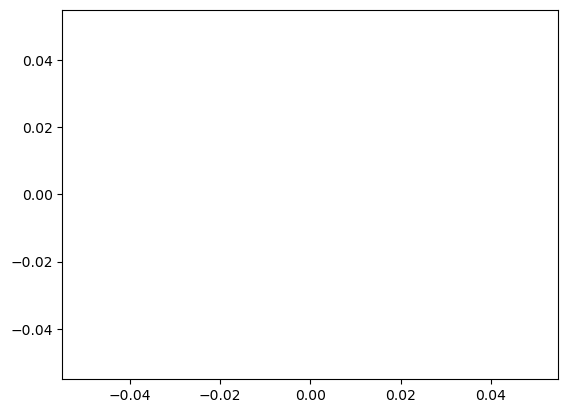

In [100]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [101]:
all_losses

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

# Running one unseen inputs

In [53]:
# Just return an output given an input
def evaluate(x):
    hidden = rnn.initHidden()

    for i in range(x.size()[0]):
        output, hidden = rnn(x[i], hidden)

    return output

In [54]:
def predict(x):
    with torch.no_grad():
        output = evaluate(x)
    return output

In [55]:
Y_predict = []
for index in range(len(X_test)):
    x = X_test[index]
    output = predict(x)
    Y_predict.append(output)

In [56]:
Y_predict[0]

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])